# Chords, examples

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.path import Path
import matplotlib.patches as patches
import math
import numpy as np
import matplotlib.collections as mcoll
from matplotlib import colors

In [59]:
class InvalidInputError(Exception):
    pass

def get_idx_interv(d, D):
    k=0
    while(d>D[k]): 
        k+=1
    return  k-1

def dist (A,B):
    return np.linalg.norm(np.array(A)-np.array(B))

Dist=[0, dist([1,0], 2*[np.sqrt(2)/2]), np.sqrt(2),
      dist([1,0],  [-np.sqrt(2)/2, np.sqrt(2)/2]), 2.0]
params=[1.2, 1.5, 1.8, 2.1]

def deCasteljau(b,t): 
    N=len(b) 
    if(N<2):
        raise InvalidInputError("The  control polygon must have at least two points")
    a=np.copy(b) #shallow copy of the list of control points 
    for r in range(1,N): 
        a[:N-r,:]=(1-t)*a[:N-r,:]+t*a[1:N-r+1,:]                             
    return a[0,:]

def BezierCv(b, nr=5):
    t=np.linspace(0, 1, nr)
    return np.array([[deCasteljau(b, t[k]),deCasteljau(b, t[k+1])] for k in range(nr-1)]) 

def position_circle(x):
    return np.array([math.cos(x*2*math.pi), math.sin(x*2*math.pi)])

def linear_gradient(start, end, n=10):
    """ Take color rgb format, and return gradient """
    gradients = np.zeros((3, n))
    for i in range(3):
        gradients[i,:] = np.linspace(start[i], end[i], num=n)
    return np.transpose(gradients)

def linear_gradient_color(c1, c2, n=10):
    return linear_gradient(colors.to_rgba(c1), colors.to_rgba(c2), n=n)

def draw_chord(A, B, ax=None, color_start="b", color_end="r"):
    """ Draw a Bezier curve between two points """
    d = dist(A, B)
    K=get_idx_interv(d, Dist)
    b = [A, A/params[K], B/params[K], B]
    bz = BezierCv(b, nr=100)
    lc = mcoll.LineCollection(bz, colors=linear_gradient_color(color_start, color_end, n=100))
    ax.add_collection(lc)

In [60]:
linear_gradient(colors.to_rgba('blue'), colors.to_rgba(palette[0]))

array([[0.        , 0.        , 1.        ],
       [0.01350763, 0.05185185, 0.96732026],
       [0.02701525, 0.1037037 , 0.93464052],
       [0.04052288, 0.15555556, 0.90196078],
       [0.0540305 , 0.20740741, 0.86928105],
       [0.06753813, 0.25925926, 0.83660131],
       [0.08104575, 0.31111111, 0.80392157],
       [0.09455338, 0.36296296, 0.77124183],
       [0.108061  , 0.41481481, 0.73856209],
       [0.12156863, 0.46666667, 0.70588235]])

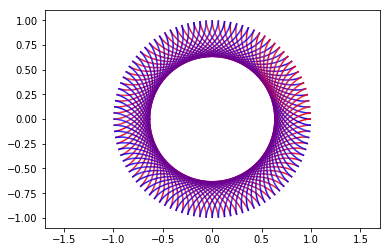

In [75]:
starts = [1]*20+[2]*20+[3]*20+[4]*20 + [5]*20
ends = [1]*10 + [2]*10 + [3]*30 + [4]*35 + [5]*5 + [1]*5 + [2]*5
nb_dots = len(starts)
categories = list(set(starts + ends))


palette = sns.color_palette()
fig, ax = plt.subplots()
for x in np.linspace(0, 1, nb_dots):
    for y in np.linspace(0, 1, nb_dots)
    A = position_circle(x)
    B = position_circle(y)
    draw_chord(A, B, ax=ax)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
plt.axis('equal')
plt.show()

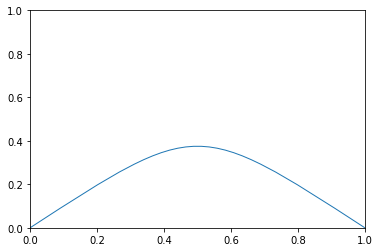

In [15]:
verts = [
    (0., 0.),  # P0
    (0.5, 0.5), # P1
    (0.5, 0.5), # P2
    (1., 0.), # P3
    ]

codes = [Path.MOVETO,
         Path.CURVE4,
         Path.CURVE4,
         Path.CURVE4,
         ]

path = Path(verts, codes)
lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm,
                              linewidth=linewidth, alpha=alpha)

palette = sns.color_palette()
fig, ax = plt.subplots()
patch = patches.PathPatch(path, facecolor='none', edgecolor=palette[0])
ax.add_patch(patch)
plt.show()